# <font size = "6"> 2- Format d'images et convolutions
---

##<font size = "5"> Question 1
<font size = "4">Expérimenter le code de convolution fourni en exemple dans Convolutions.py. Observer la différence entre le calcul direct par balayage du tableau 2d et le calcul utilisant la fonction Ilter2d d’OpenCV. Déchiffrer les fonctions OpenCV utilisées pour la lecture et la copie d’images, ainsi que la fonction MatPlotLib utilisée pour l’affichage.

Install the library

In [1]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
TD_DIR = 'gdrive/My Drive/Ensta/MI204'

Dimension de l'image : 240 lignes x 360 colonnes
Méthode directe : 0.237026047 s
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
Méthode filter2D : 0.033303305 s


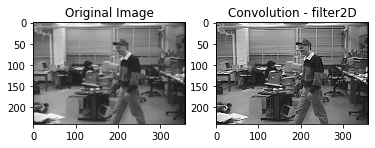

In [4]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

#Lecture image en niveau de gris et conversion en float64
img=np.float64(cv2.imread(TD_DIR+'/Image_Pairs/JBQ1.png',0))
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")

#Méthode directe
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")

#cv2.imshow('Avec boucle python',img2.astype(np.uint8))
#Convention OpenCV : une image de type entier est interprétée dans {0,...,255}
#cv2.waitKey(0)  

plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')

#Méthode filter2D
t1 = cv2.getTickCount()
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
print(kernel)
#kernel = np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])
img3 = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")

#cv2.imshow('Avec filter2D',img3/255.0)
#Convention OpenCV : une image de type flottant est interprétée dans [0,1]
#cv2.waitKey(0)

plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#Convention Matplotlib : par défaut, normalise l'histogramme !
plt.title('Convolution - filter2D')



plt.show()

Open CV ne fonctionne pas ici

##<font size = "5"> Question 2
<font size = "4">Expliquer pourquoi le noyau de convolution fourni en exemple réalise un réhaussement de contraste par rapport à l’image originale.

Le noyaux se concentre sur le pixel cible, réduit les effets des pixels de bords et met en evidence la difference :

[ 0  -1  0] \\
[-1   5 -1] \\
[ 0  -1  0]

##<font size = "5"> Question 3
<font size = "4">Modifier le code pour calculer les convolutions qui approximent les composantes du gradient $I_x = \frac{∂I}{∂x}$ et $I_y = \frac{∂I}{∂y}$

Calculer ensuite la norme euclidienne du gradient $||∇I|| = \sqrt{I_{x}^2+I_{y}^2}$.


Quelles
précautions doivent être prises pour obtenir un affichage

**On reprend le code de la question 1**

###$I_x$ est approximé par une convolution avec le noyau $[-1, \  1]$


De même, $I_y$ est approximé par convolution avec le noyau $[-1,\  1]^T$

Dimension de l'image : 418 lignes x 402 colonnes
Méthode directe : 1.255321962 s


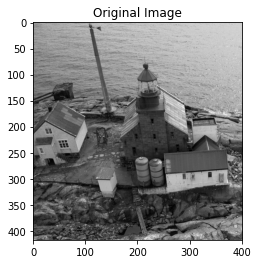


kernel_x: [-1  1]
Méthode filter2D : 0.002147655 s


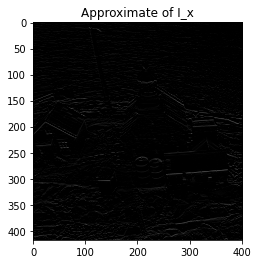


kernel_y: [[-1]
 [ 1]]
Méthode filter2D : 0.00294072 s


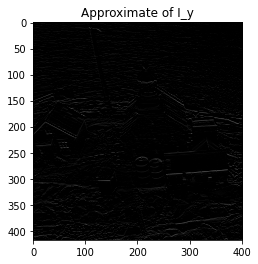

In [22]:
#Image originale
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")

plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.show()


#Méthode filter2D
t1 = cv2.getTickCount()
kernel_x = np.array([-1, 1])
print(f"\nkernel_x: {kernel_x}")
img3 = cv2.filter2D(img,-1,kernel_x)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")

#plt.subplot(121)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#Convention Matplotlib : par défaut, normalise l'histogramme !
plt.title('Approximate of I_x')
plt.show()


#Méthode filter2D
t1 = cv2.getTickCount()
kernel_y = np.array([[-1], [1]])
print(f"\nkernel_y: {kernel_y}")
img3 = cv2.filter2D(img,-1,kernel_y)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")

#plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#Convention Matplotlib : par défaut, normalise l'histogramme !
plt.title('Approximate of I_y')



plt.show()

###On utilisera plutot les noyaux [-1 0 1] et sa transposée pour produire des frontières plus épaisses.

Dimension de l'image : 418 lignes x 402 colonnes
Méthode directe : 0.563668629 s


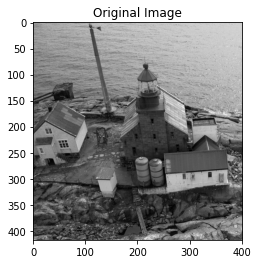


kernel_x: [-1  0  1]
Méthode filter2D : 0.00638898 s


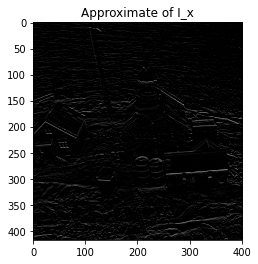


kernel_y: [[-1]
 [ 0]
 [ 1]]
Méthode filter2D : 0.003187457 s


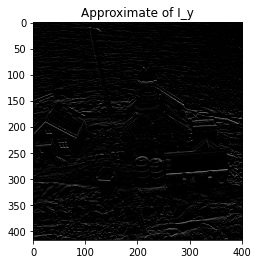

In [26]:
#Image originale
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")

plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.show()


#Méthode filter2D
t1 = cv2.getTickCount()
kernel_x = np.array([-1,0, 1])
print(f"\nkernel_x: {kernel_x}")
img3 = cv2.filter2D(img,-1,kernel_x)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")

#plt.subplot(121)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#Convention Matplotlib : par défaut, normalise l'histogramme !
plt.title('Approximate of I_x')
plt.show()


#Méthode filter2D
t1 = cv2.getTickCount()
kernel_y = np.array([[-1],[0], [1]])
print(f"\nkernel_y: {kernel_y}")
img3 = cv2.filter2D(img,-1,kernel_y)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")

#plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#Convention Matplotlib : par défaut, normalise l'histogramme !
plt.title('Approximate of I_y')



plt.show()

###Calcul de $||∇I|| = \sqrt{I_{x}^2+I_{y}^2}$.

$I_{x}[i, j] = (f*h_x)[i,j]$ avec $h_x = [\  [-1\ 0 \ 1]\  [-2\ 0\ 2]\  [-1\ 0\ 1]\  ]$


$I_{y}[i, j] = (f*h_y)[i,j]$ avec $h_y = [\  [-1\ 0 \ 1]\  [0\ 0\ 0]\  [1\ 2\ 1]\  ]$


$||∇I[i,j]|| = \sqrt{I_{x}^2[i,j]+I_{y}^2[i,j]} =  \sqrt{(f*h_y)^2[i,j]+(f*h_x)^2[i,j]}$



shape of delta_I : (418, 402)


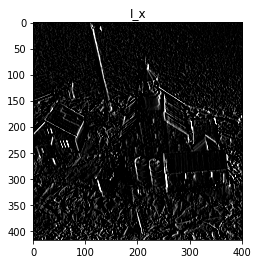

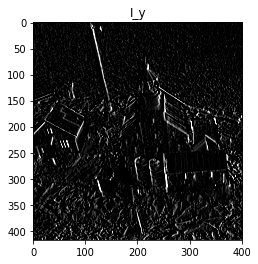

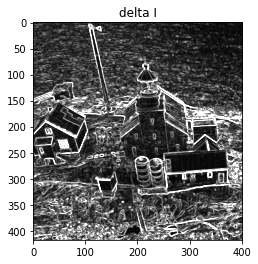

In [42]:
h_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
h_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

I_x = cv2.filter2D(img,-1,h_x)
I_y = cv2.filter2D(img,-1,h_y)

#Calcul de delta_I :
delta_I = np.sqrt(I_x**2+I_y**2)
print(f"shape of delta_I : {delta_I.shape}")

#Regardons ce qu'il en est :
plt.imshow(I_x,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('I_x')
plt.show()

plt.imshow(I_x,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('I_y')
plt.show()


plt.imshow(delta_I,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('delta I')
plt.show()

<font size = "6">**Précautions à prendre pour obtenir un affichage ?**

# <font size = "6"> 3- Détecteurs

---

##<font size = "5"> Question 1
<font size = "4"> Completer  le code fourni dans le script Harris.py pour calculer la fonction d’interet de Harris (a
une seule echelle, en utilisant une fenetre W de taille fixe), et les points d’interet correspondants. Expliquer comment le code fourni, qui utilise la dilatation morphologique (maximum dans un voisinage
donne), permet de calculer les maxima locaux de la fonction d’interet Theta.
